# Linear Clasifier in TensorFlow



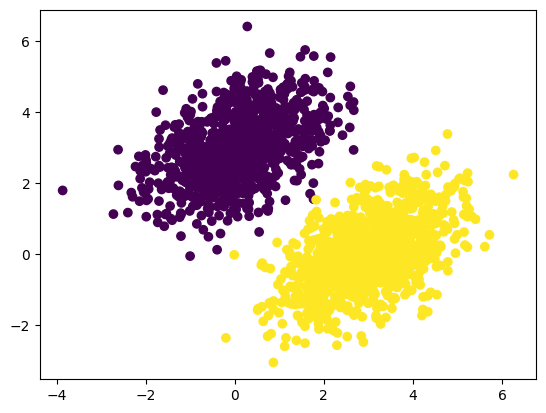

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

num_of_samples = 1000
# generating two classes of random points, with different mean and
# same coveriance in a 2D plane
negative_samples = np.random.multivariate_normal(
 mean=[0, 3],
 cov=[[1, 0.5],[0.5, 1]],
 size=num_of_samples)
positive_samples = np.random.multivariate_normal(
 mean=[3, 0],
 cov=[[1, 0.5],[0.5, 1]],
 size=num_of_samples)

# stacking the two classes data points in a single array
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

# generating corresponding target labels
targets = np.vstack((np.zeros((num_of_samples, 1), dtype="float32"),
 np.ones((num_of_samples, 1), dtype="float32")))

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()


In [ ]:
# creating our linear classifier variables
input_dim = 2
output_dim = 1
# weights are initialized with random values of 2x1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
# the bias is initalized with all zeros
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [22]:
# the fast forward pass
# returns (prediction =) W . x + b
# where, W = 2 dim weights: w1 and w2
# x = 2 dim inputs: x and y
# we get a dot product of w and x and sum it with bias
def model(inputs):
  return tf.matmul(inputs, W) + b

In [27]:
# the loss function
# returns average of the per sample losses (reduce_mean)
def square_loss(targets, predictions):
  # tensor with same shape as targets and predictions, with square of their -
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [25]:
# the training step

learning_rate = 0.1

def training_step(inputs, targets):
  # GradientTape context; records all operations that involve the training vars
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)

  # calculate the gradient of the loss with respect of training vars
  grad_loss_W, grad_loss_b = tape.gradient(loss, [W, b])

  # update the parameters(W and b) by subtracting the gradient loss scaled by
  # learning rate, for each
  W.assign_sub(grad_loss_W * learning_rate)
  b.assign_sub(grad_loss_b * learning_rate)
  return loss

In [28]:
# training loop
# we run the training loop for 40 steps, and we can see the loss stabilizing
# after each steps

for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 7.0795
Loss at step 1: 0.9226
Loss at step 2: 0.2539
Loss at step 3: 0.1630
Loss at step 4: 0.1427
Loss at step 5: 0.1318
Loss at step 6: 0.1228
Loss at step 7: 0.1146
Loss at step 8: 0.1071
Loss at step 9: 0.1002
Loss at step 10: 0.0940
Loss at step 11: 0.0882
Loss at step 12: 0.0829
Loss at step 13: 0.0781
Loss at step 14: 0.0736
Loss at step 15: 0.0696
Loss at step 16: 0.0659
Loss at step 17: 0.0625
Loss at step 18: 0.0593
Loss at step 19: 0.0565
Loss at step 20: 0.0538
Loss at step 21: 0.0514
Loss at step 22: 0.0492
Loss at step 23: 0.0472
Loss at step 24: 0.0453
Loss at step 25: 0.0437
Loss at step 26: 0.0421
Loss at step 27: 0.0407
Loss at step 28: 0.0394
Loss at step 29: 0.0382
Loss at step 30: 0.0371
Loss at step 31: 0.0361
Loss at step 32: 0.0351
Loss at step 33: 0.0343
Loss at step 34: 0.0335
Loss at step 35: 0.0328
Loss at step 36: 0.0322
Loss at step 37: 0.0316
Loss at step 38: 0.0310
Loss at step 39: 0.0305


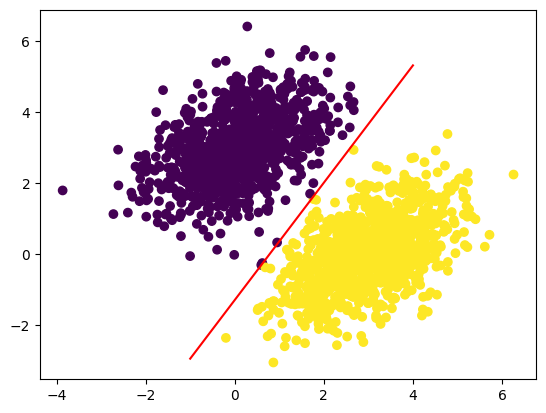

In [30]:
# plotting to show how our model classifies the training data points

predictions = model(inputs)
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
